In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings. filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df=pd.read_csv('/content/drive/MyDrive/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [4]:
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [5]:
df.tail()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France
244827,Creating a UGC Ad for Our Mobile Game,https://www.upwork.com/jobs/Creating-UGC-for-O...,2024-03-24 13:53:00+00:00,False,NaN,NaN,50.0,Israel


In [6]:
df.shape

(244828, 8)

In [7]:
df.info

<bound method DataFrame.info of                                                     title  \
0       Experienced Media Buyer For Solar Pannel and R...   
1                                    Full Stack Developer   
2                                         SMMA Bubble App   
3                  Talent Hunter Specialized in Marketing   
4                                           Data Engineer   
...                                                   ...   
244823  Need Facebook advertising experts to launch pr...   
244824          Digital/Telemarketing/Sales/OutSide Sales   
244825                           WordPress Template Edits   
244826            ELEMENTOR PRO For quick fix (Wordpress)   
244827              Creating a UGC Ad for Our Mobile Game   

                                                     link  \
0       https://www.upwork.com/jobs/Experienced-Media-...   
1       https://www.upwork.com/jobs/Full-Stack-Develop...   
2       https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3       https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4       https://www.upwork.com/jobs/Data-Engineer_%7E0...   
...                                                   ...   
244823  https://www.upwork.com/jobs/Need-Facebook-adve...   
244824  https://www.upwork.com/jobs/Digital-Telemarket...   
244825  https://www.upwork.com/jobs/WordPress-Template...   
244826  https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...   
244827  https://www.upwork.com/jobs/Creating-UGC-for-O...   

                   published_date  is_hourly  hourly_low  hourly_high  budget  \
0       2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1       2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2       2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3       2024-02-17 09:08:08+00:00       True         NaN          NaN     NaN   
4       2024-02-17 09:07:42+00:00      False         NaN          NaN   650.0   
...                           ...        ...         ...          ...     ...   
244823  2024-03-24 13:28:38+00:00       True        20.0        100.0     NaN   
244824  2024-03-24 13:40:52+00:00      False         NaN          NaN   100.0   
244825  2024-03-24 13:37:50+00:00       True         5.0         30.0     NaN   
244826  2024-03-24 13:52:15+00:00      False         NaN          NaN    15.0   
244827  2024-03-24 13:53:00+00:00      False         NaN          NaN    50.0   

              country  
0                 NaN  
1       United States  
2       United States  
3       United States  
4               India  
...               ...  
244823         Zambia  
244824      Sri Lanka  
244825  United States  
244826         France  
244827         Israel  

[244828 rows x 8 columns]>

In [8]:
df.isnull().sum()

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [9]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return [] # Return an empty list for non-string values

df['keywords'] = df['title'].apply(extract_keywords)


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # Download VADER lexicon for sentiment analysis
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
df=pd.read_csv('/content/drive/MyDrive/all_upwork_jobs_2024-02-07-2024-03-24.csv')


Treat the null values present in Budget column based on the sentiment

In [13]:
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df['keywords'] = df['title'].apply(extract_keywords)

In [14]:
# Calculate median salary (replace with your actual salary column if different)
median_salary = df['budget'].median()

In [15]:
# Function to analyze sentiment and fill null budget values
def fill_budget_by_sentiment(row):
    if pd.isnull(row['budget']):
        try:
            analyzer = SentimentIntensityAnalyzer()
            text = str(row['title']) + ' ' + str(row['country']) # Combine relevant text
            scores = analyzer.polarity_scores(text)

            if scores['compound'] >= 0.05:
                return median_salary * 1.1  # Increase budget for positive sentiment
            elif scores['compound'] <= -0.05:
                return median_salary * 0.9 # Decrease budget for negative sentiment
            else:
                return median_salary      # Keep as median for neutral sentiment
        except Exception as e: #Handle exceptions for unexpected issues
          print(f"Error processing row: {e}")
          return median_salary #Fallback: if an error happens, return median salary
    else:
        return row['budget']

df['budget'] = df.apply(fill_budget_by_sentiment, axis=1)


In [16]:
df['budget'].isnull().sum()

0

Treat the null values present in country feature with mode value

In [17]:
# Fill missing 'country' values with the mode
country_mode = df['country'].mode()[0]
df['country'].fillna(country_mode, inplace=True)


In [18]:
df.isnull().sum()

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,0
country,0
keywords,0


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [20]:
df['high_demand'] = df['budget'] > df['budget'].quantile(0.75)

In [21]:
# Combine relevant text features for vectorization
df['combined_text'] = df['title'] + ' ' + df['country'] #Example, combine more columns
df['combined_text'].fillna('', inplace=True)
df['combined_text'] = df['combined_text'].astype(str)

In [22]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['combined_text'])

In [23]:
# Split data
y = df['high_demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a classification model (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.8304946289261936


In [27]:
pip install scikeras

In [28]:
from scikeras.wrappers import KerasRegressor

In [29]:
df['keywords']

,keywords
0,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,"[Full, Stack, Developer]"
2,"[SMMA, Bubble, App]"
3,"[Talent, Hunter, Specialized, in, Marketing]"
4,"[Data, Engineer]"
...,...
244823,"[Need, Facebook, advertising, experts, to, lau..."
244824,"[Digital/Telemarketing/Sales/OutSide, Sales]"
244825,"[WordPress, Template, Edits]"
244826,"[ELEMENTOR, PRO, For, quick, fix, (, Wordpress..."


Analyze the correlation between job title keywords and offered salaries , bar plot in different colors for each keyword

In [30]:
# Convert the list of keywords back to a string for easier analysis
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['keywords_str'])


In [31]:
# Convert the sparse matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a dataframe from the TF-IDF array
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())


# Combine TF-IDF scores with salaries
keyword_salary_df = pd.concat([df['budget'], tfidf_df], axis=1)


# Calculate the correlation between each keyword and salary
correlations = keyword_salary_df.corr()['budget'].drop('budget')


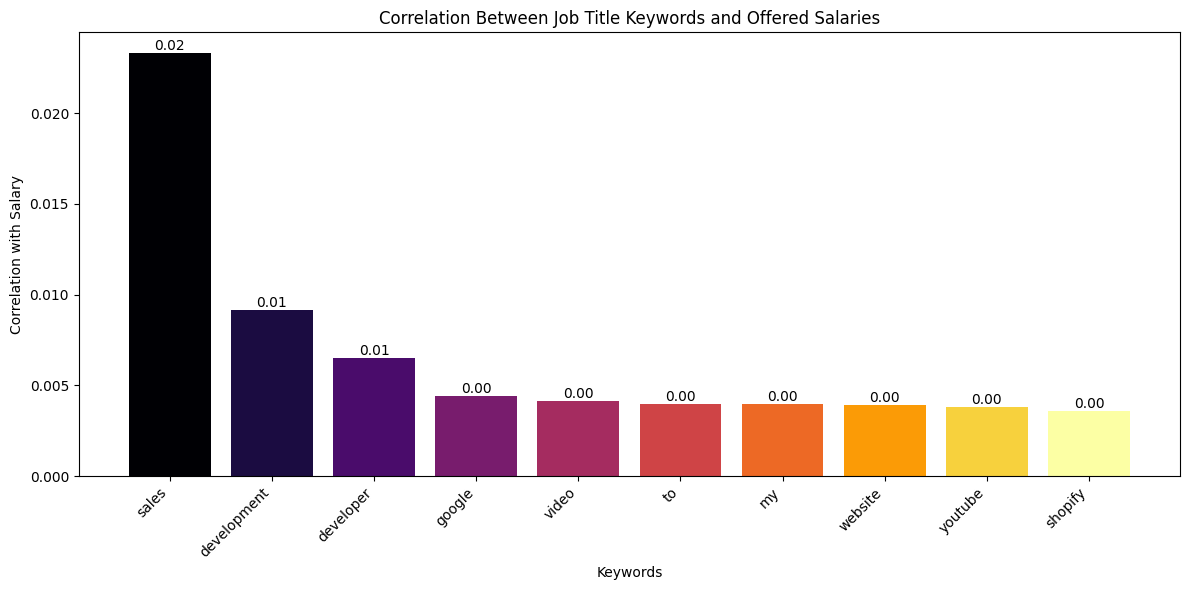

In [33]:
# Select top keywords with highest absolute correlation values
top_keywords = correlations.abs().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))

# Customize colors for each bar
colors = plt.cm.inferno(np.linspace(0, 1, len(top_keywords)))  # Use a colormap for variety

bars = plt.bar(top_keywords.index, top_keywords.values, color=colors)

# Add value labels to the bars
for bar, value in zip(bars, top_keywords.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')


plt.xlabel("Keywords")
plt.ylabel("Correlation with Salary")
plt.title("Correlation Between Job Title Keywords and Offered Salaries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

In [35]:
# Download necessary NLTK data (only needed once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df=pd.read_csv('/content/drive/MyDrive/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [37]:
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]



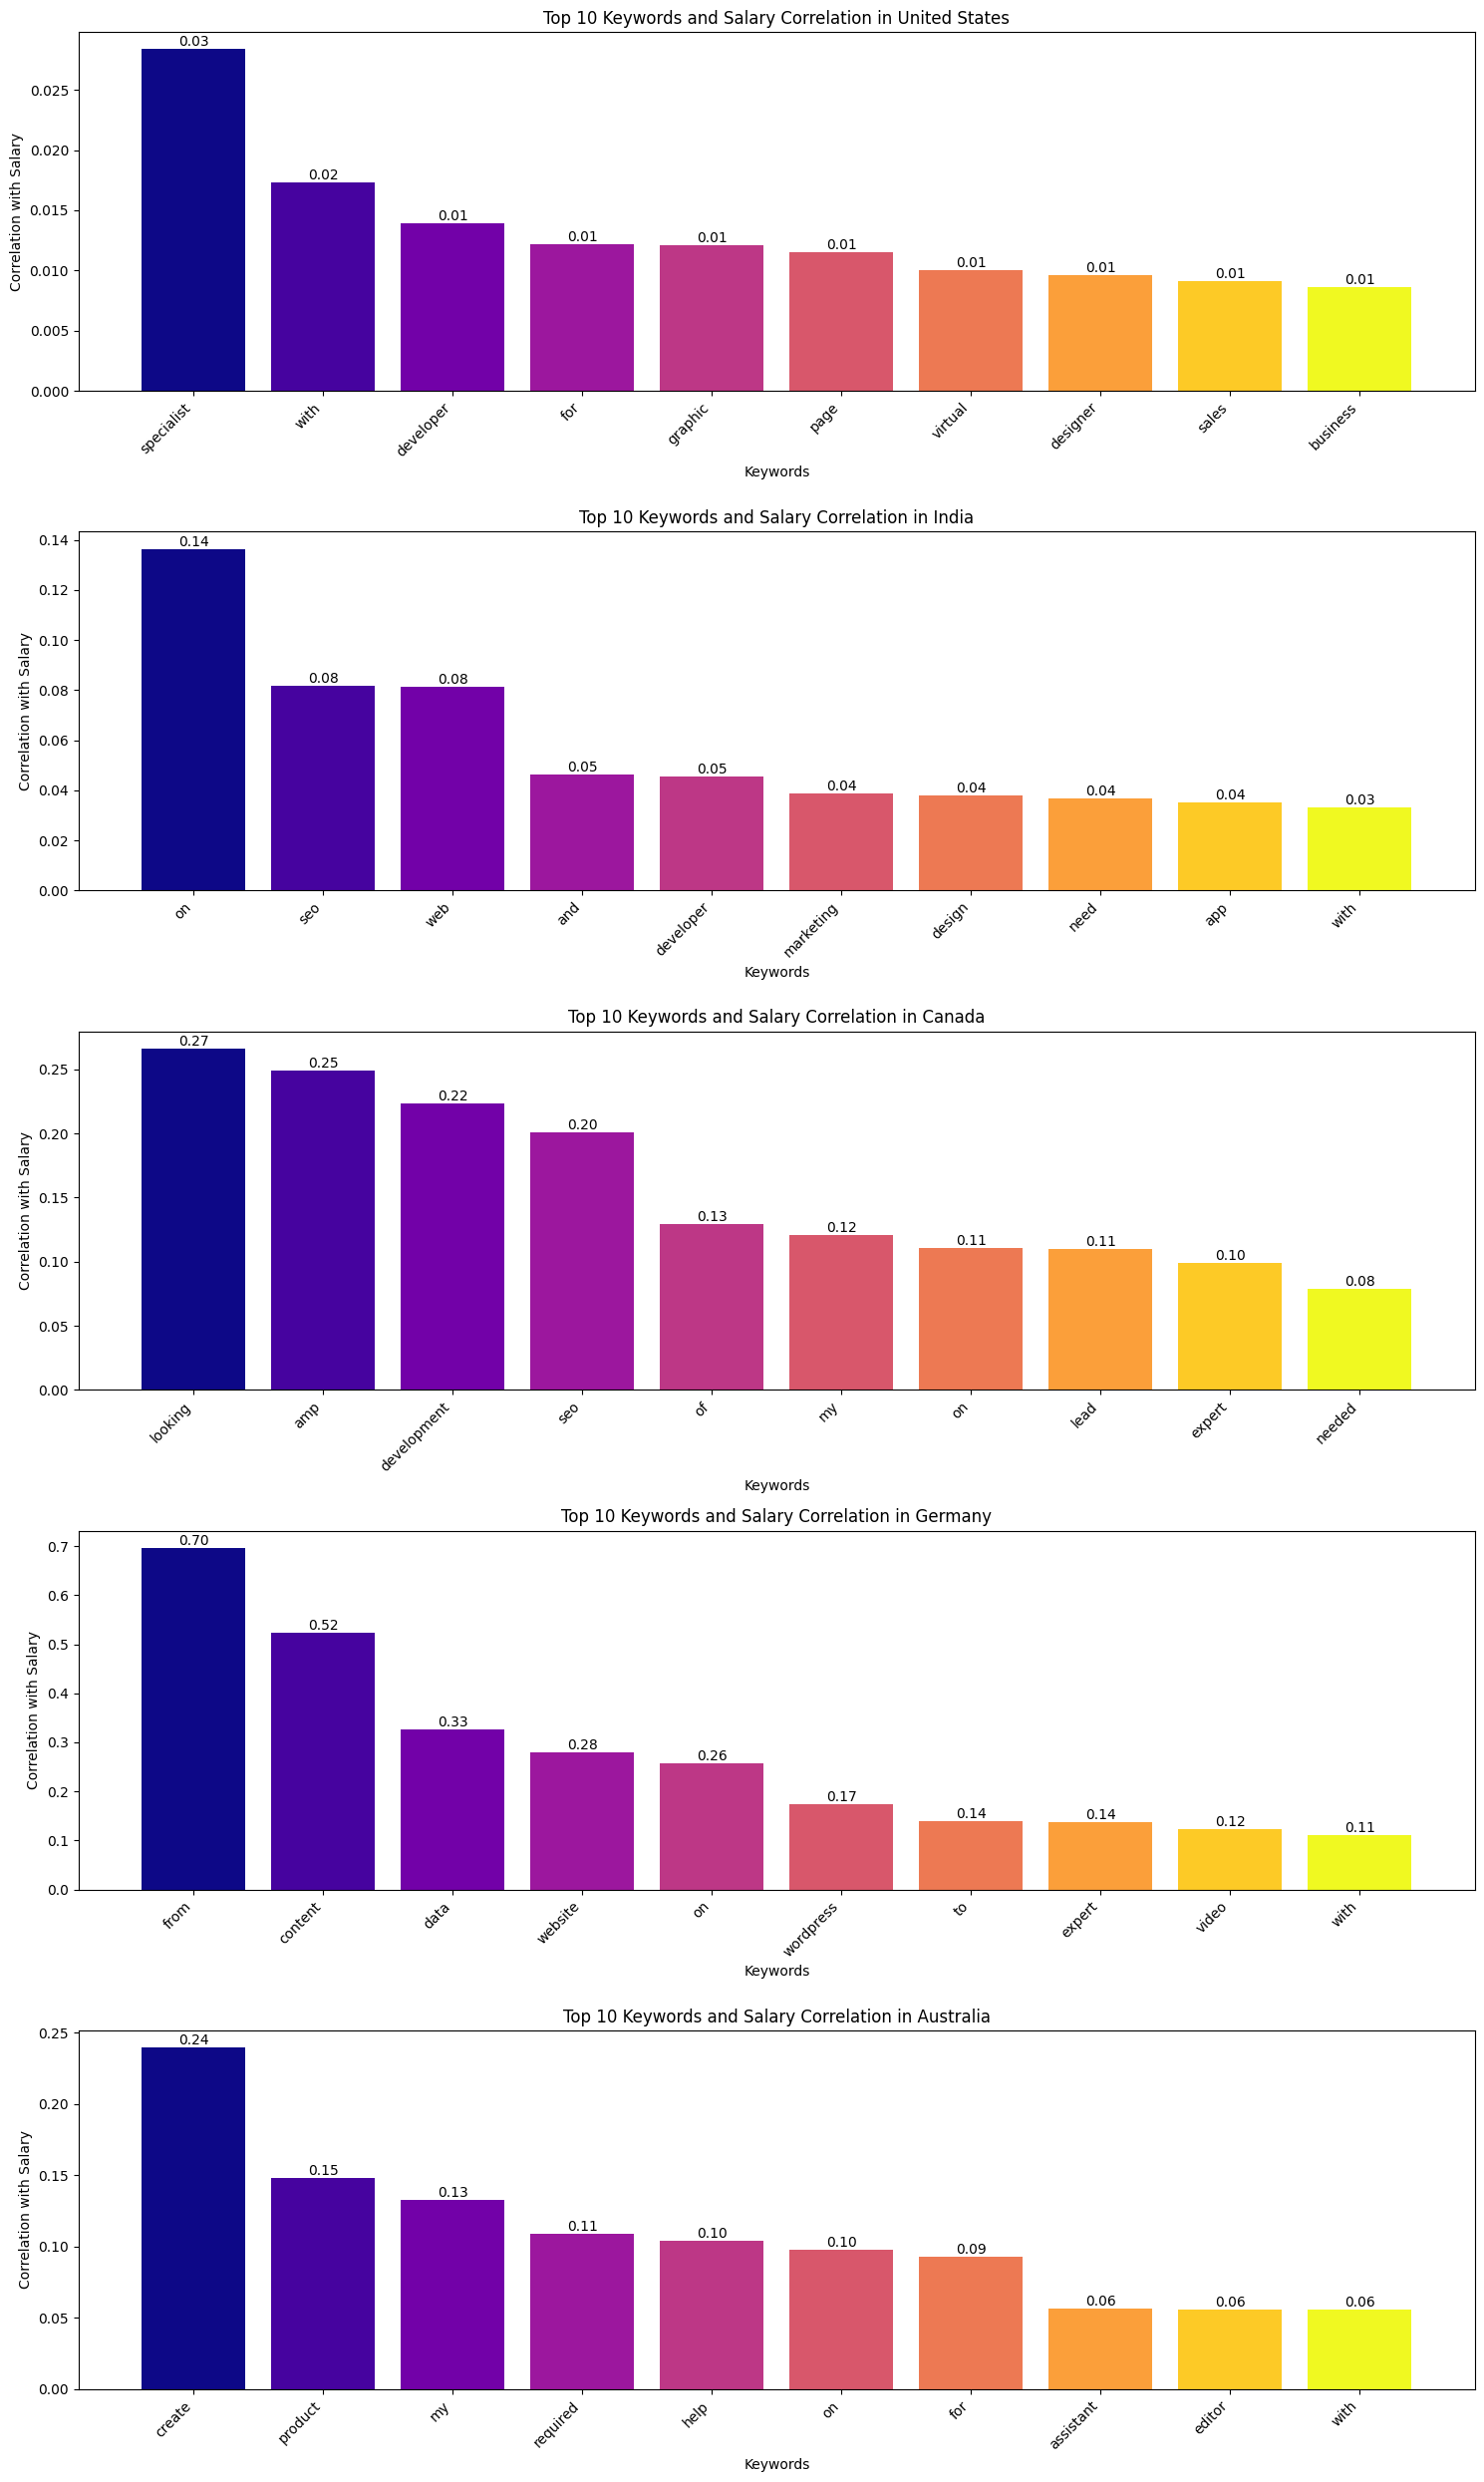

In [38]:
# Convert 'budget' column to numeric, coercing errors to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

countries = ['United States', 'India', 'Canada', 'Germany', 'Australia']
plt.figure(figsize=(15, 25)) # Adjust figure size to accommodate multiple subplots

for i, country in enumerate(countries):
    # Filter data for the current country
    df_country = df[df['country'] == country]

    # Handle cases where there might be no data for a country
    if df_country.empty:
        print(f"No data found for {country}. Skipping.")
        continue

    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df_country['keywords_str'])
    tfidf_array = tfidf_matrix.toarray()
    tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

    keyword_salary_df = pd.concat([df_country['budget'], tfidf_df], axis=1)
    correlations = keyword_salary_df.corr()['budget'].drop('budget')
    top_keywords = correlations.abs().sort_values(ascending=False).head(10)

    plt.subplot(5, 1, i+1)
    colors = plt.cm.get_cmap('plasma', len(top_keywords))
    bars = plt.bar(top_keywords.index, top_keywords.values, color=colors(range(len(top_keywords))))

    for bar, value in zip(bars, top_keywords.values):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    plt.xlabel("Keywords")
    plt.ylabel("Correlation with Salary")
    plt.title(f"Top 10 Keywords and Salary Correlation in {country}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


Task 2: Identify emerging job categories based on posting frequency ● Objective: To identify new and emerging job categories by analyzing the frequency and trend of job postings. Display the 10 jobs with all different colors

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [40]:
# Assuming 'df' is your DataFrame and 'title' column contains job titles
# If not, replace 'df' and 'title' with your actual DataFrame and column name

def count_job_titles(df):
    """
    Counts the frequency of job titles and returns the top 10.
    """
    title_counts = Counter(df['title'])
    top_10_titles = title_counts.most_common(10)  # Get the top 10 most frequent job titles

    return top_10_titles

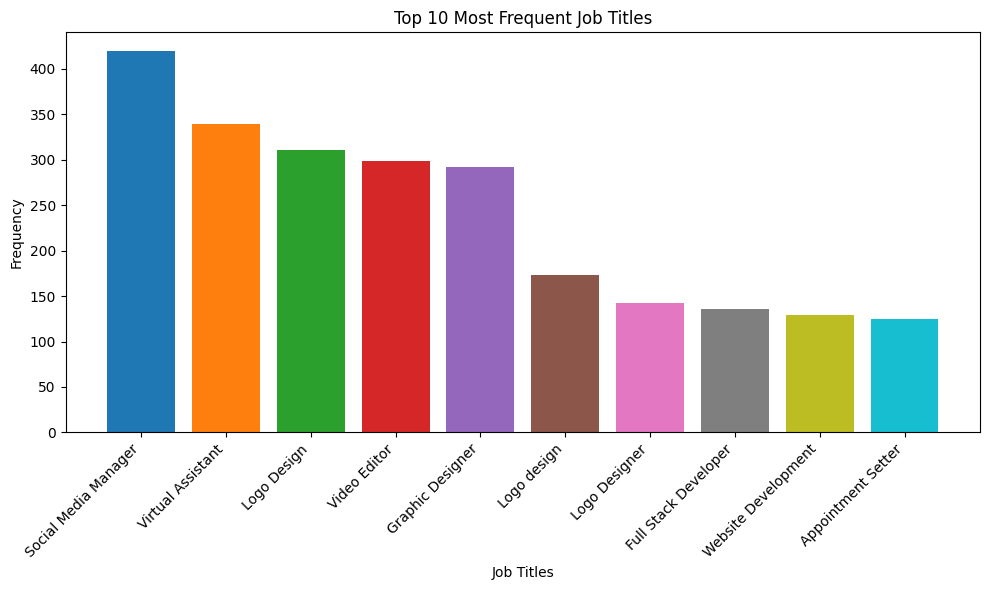

In [41]:
def plot_top_job_titles(top_jobs):
    """
    Plots the top 10 job titles with different colors.
    """
    titles, counts = zip(*top_jobs)

    colors = plt.cm.get_cmap('tab10', len(titles))  # Use a colormap for distinct colors

    plt.figure(figsize=(10, 6))
    bars = plt.bar(titles, counts, color=colors(range(len(titles))))

    plt.xlabel("Job Titles")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Frequent Job Titles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_jobs = count_job_titles(df)
plot_top_job_titles(top_jobs)


Task-3-Predict high-demand job roles by analyzing job posting patterns over time To forecast high-demand job roles based on historical job posting data.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [43]:
# Split data (already done in your code, but repeating here for clarity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate multiple classification models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8304946289261936
Random Forest Accuracy: 0.841440999877466
Naive Bayes Accuracy: 0.8295756239022996


save the random forest model in a pickle file

In [44]:
import pickle
# Assuming 'model' is your trained RandomForestClassifier
filename = 'random_forest_model.pkl'  # Choose a filename for your saved model
pickle.dump(model, open(filename, 'wb'))


save the vectorizer used above in a pickle file

In [45]:
# Assuming 'vectorizer' is the TfidfVectorizer object you used above.
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))


LSTM model

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [47]:
# Prepare the data
X = df[['title', 'country']] # Features
y = df['budget'] # Target variable

In [48]:
# Preprocess text data (title)
tokenizer = Tokenizer(num_words=5000) # Adjust num_words as needed
tokenizer.fit_on_texts(X['title'].astype(str)) # Convert to string to avoid error
X_title_seq = tokenizer.texts_to_sequences(X['title'].astype(str))
X_title_padded = pad_sequences(X_title_seq, maxlen=100) # Adjust maxlen


In [49]:
# Encode categorical features (country)
label_encoder = LabelEncoder()
X['country'] = label_encoder.fit_transform(X['country'])



In [50]:
# Scale numerical features (budget) if needed (optional)

# Combine features
X_combined = np.hstack([X_title_padded, X['country'].values.reshape(-1, 1)])


In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [52]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1])) # Adjust input_length
model.add(LSTM(64))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse') # Use mse for regression


In [53]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust parameters


Epoch 1/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 439s 79ms/step - loss: nan - val_loss: nan
Epoch 2/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 393s 70ms/step - loss: nan - val_loss: nan
Epoch 3/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 398s 72ms/step - loss: nan - val_loss: nan
Epoch 4/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 437s 71ms/step - loss: nan - val_loss: nan
Epoch 5/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 402s 73ms/step - loss: nan - val_loss: nan
Epoch 6/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 432s 71ms/step - loss: nan - val_loss: nan
Epoch 7/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 440s 71ms/step - loss: nan - val_loss: nan
Epoch 8/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 392s 71ms/step - loss: nan - val_loss: nan
Epoch 9/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 393s 71ms/step - loss: nan - val_loss: nan
Epoch 10/10
5509/5509 ━━━━━━━━━━━━━━━━━━━━ 393s 71ms/step - loss: nan - val_loss: nan


In [54]:
# Make predictions
predictions = model.predict(X_test)

1531/1531 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step


In [55]:
#Save the model to a pickle file
filename = 'lstm_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#Load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))

Task-3-Predict high-demand job roles by analyzing job posting patterns over time To forecast high-demand job roles based on historical job posting data.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [59]:
def predict_job_demand(df, target_variable='budget'):
    # Prepare the data
    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df['keywords_str'])
    X = tfidf_matrix.toarray()  # Features
    y = df[target_variable]    # Target variable (e.g., budget or frequency)

    # Handle missing target values
    X = X[~y.isna()]
    y = y[~y.isna()]

    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)
    # Train multiple models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"model": model, "mse": mse, "r2": r2}
        print(f"{name}: MSE={mse:.2f}, R^2={r2:.2f}")

    return results, tfidf, scaler

In [60]:
# Predict job demand based on budget
results, tfidf_vectorizer, scaler = predict_job_demand(df)

# Example: predict demand for a new job title using the best model (Random Forest in this example)
new_job_title = "Python Data Scientist"
new_job_keywords = extract_keywords(new_job_title)
new_job_keywords_str = ' '.join(map(str, new_job_keywords))
new_job_tfidf = tfidf_vectorizer.transform([new_job_keywords_str])
predicted_demand_scaled =  results["Random Forest"]["model"].predict(new_job_tfidf)
predicted_demand = scaler.inverse_transform(predicted_demand_scaled.reshape(-1,1))
print(f"Predicted demand for '{new_job_title}': {predicted_demand[0][0]}")



Linear Regression: MSE=0.00, R^2=0.00
Random Forest: MSE=0.00, R^2=-0.08
Predicted demand for 'Python Data Scientist': 459.2849588615472


Task 4: Compare average hourly rates across different countries ● Objective: To compare and analyze the average hourly rates offered across different geographical locations. ● Deliverables: An interactive map or chart showing hourly rates by country with job titles


In [ ]:
# Remove NaN values and ensure all job titles are string
df = df.dropna(subset=['title'])
df['title'] = df['title'].astype(str)

In [ ]:
# Define Manual stopwords

manual_stopwords = {'for','and','the','to','in','of','on','with','a','an','at','is','as','by','this','that','from',
                    'it','we','you','our','your','us','or','if','are','be','will','needed','need','looking','amp','create'}

In [ ]:
# Clean and tokenize job titles

df['title_cleaned'] = df['title'].str.lower().str.replace(r'[^a-z\s]','',regex=True)
df['keywords'] = df['keywords'].apply(lambda x: [word for word in x if word not in manual_stopwords])

In [ ]:
from collections import Counter # Import the Counter object from the collections module

# Count keyword occurences
all_keywords = [word for keywords in df['keywords'] for word in keywords]
keyword_counts = Counter(all_keywords)

In [ ]:
# Create a mapping of keywords to job salaries
keyword_salary = {}
for index, row in df.iterrows():
    salary = None
    if row['is_hourly'] and not pd.isna(row['hourly_low']) and not pd.isna(row['hourly_high']):
        salary = (row['hourly_low'] + row['hourly_high']) / 2  # Average hourly rate
    elif not row['is_hourly'] and not pd.isna(row['budget']):
        salary = row['budget']  # Fixed price job

    if salary is not None:
        for keyword in row['keywords']:
            if keyword in keyword_counts:
                if keyword not in keyword_salary:
                    keyword_salary[keyword] = []
                keyword_salary[keyword].append(salary)

In [ ]:
# Compute average salary per keyword
keyword_avg_salary = {key: np.mean(values) for key, values in keyword_salary.items()}

# Get top 20 highest-paying keywords
sorted_keyword_salary = sorted(keyword_avg_salary.items(), key=lambda x: x[1], reverse=True)[:20]

# Print results
print("Top 20 highest-paying job keywords:")
for keyword, avg_salary in sorted_keyword_salary:
    print(f"{keyword}: ${avg_salary:.2f}")

Top 20 highest-paying job keywords:
independence: $1000000.00
Martkeplace: $1000000.00
1M/Month: $1000000.00
token-2022: $999999.00
responsivo: $700000.00
Webseries: $600000.00
⚠️: $500025.00
counsellor: $400000.00
representant: $400000.00
Telco: $332448.33
exiting: $166750.00
Thanks: $142869.29
140K: $140000.00
Practioner: $125010.00
High-ticket: $120000.00
Callers: $115563.94
art/designer: $112000.00
Department: $111731.06
sitio: $100069.64
FBM: $100052.40


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return [] # Return an empty list for non-string values

df['keywords'] = df['title'].apply(extract_keywords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df['keywords']

,keywords
0,"[Experienced, Media, Buyer, For, Solar, Pannel..."
1,"[Full, Stack, Developer]"
2,"[SMMA, Bubble, App]"
3,"[Talent, Hunter, Specialized, in, Marketing]"
4,"[Data, Engineer]"
...,...
244823,"[Need, Facebook, advertising, experts, to, lau..."
244824,"[Digital/Telemarketing/Sales/OutSide, Sales]"
244825,"[WordPress, Template, Edits]"
244826,"[ELEMENTOR, PRO, For, quick, fix, (, Wordpress..."


Analyze the correlation between job title keywords and offered salaries

In [ ]:
# Convert the list of keywords back to a string for easier analysis
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=50)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['keywords_str'])

# Convert the sparse matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a dataframe from the TF-IDF array
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())


# Combine TF-IDF scores with salaries
keyword_salary_df = pd.concat([df['budget'], tfidf_df], axis=1)


# Calculate the correlation between each keyword and salary
correlations = keyword_salary_df.corr()['budget'].drop('budget')


# Select top keywords with highest absolute correlation values
top_keywords = correlations.abs().sort_values(ascending=False).head(10)




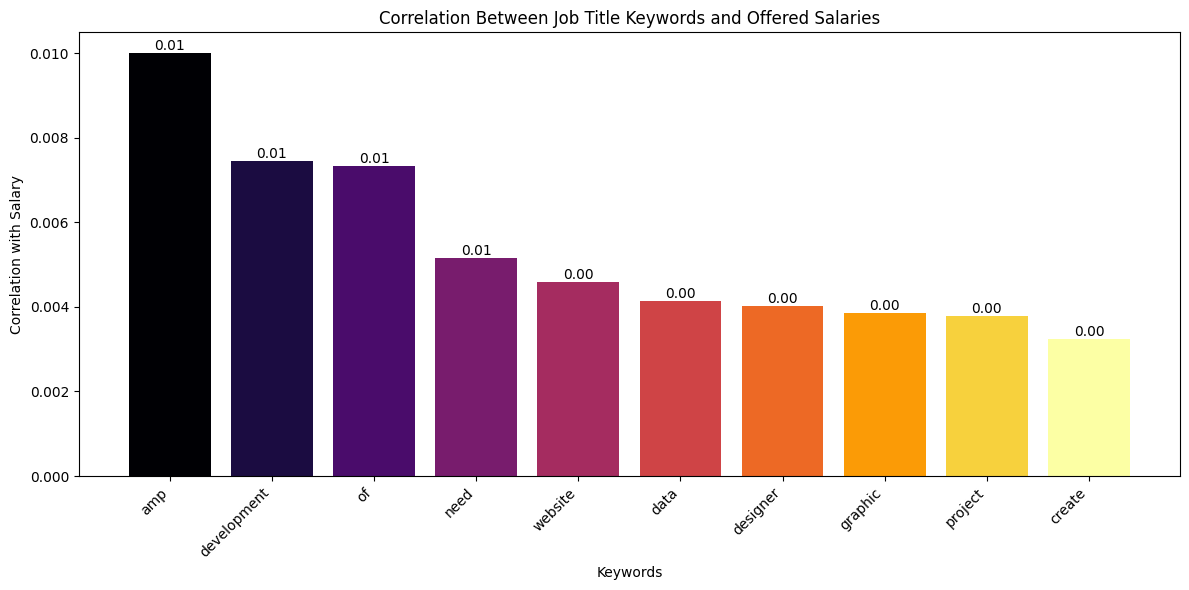

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))

# Customize colors for each bar
colors = plt.cm.inferno(np.linspace(0, 1, len(top_keywords)))  # Use a colormap for variety

bars = plt.bar(top_keywords.index, top_keywords.values, color=colors)

# Add value labels to the bars
for bar, value in zip(bars, top_keywords.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')


plt.xlabel("Keywords")
plt.ylabel("Correlation with Salary")
plt.title("Correlation Between Job Title Keywords and Offered Salaries")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

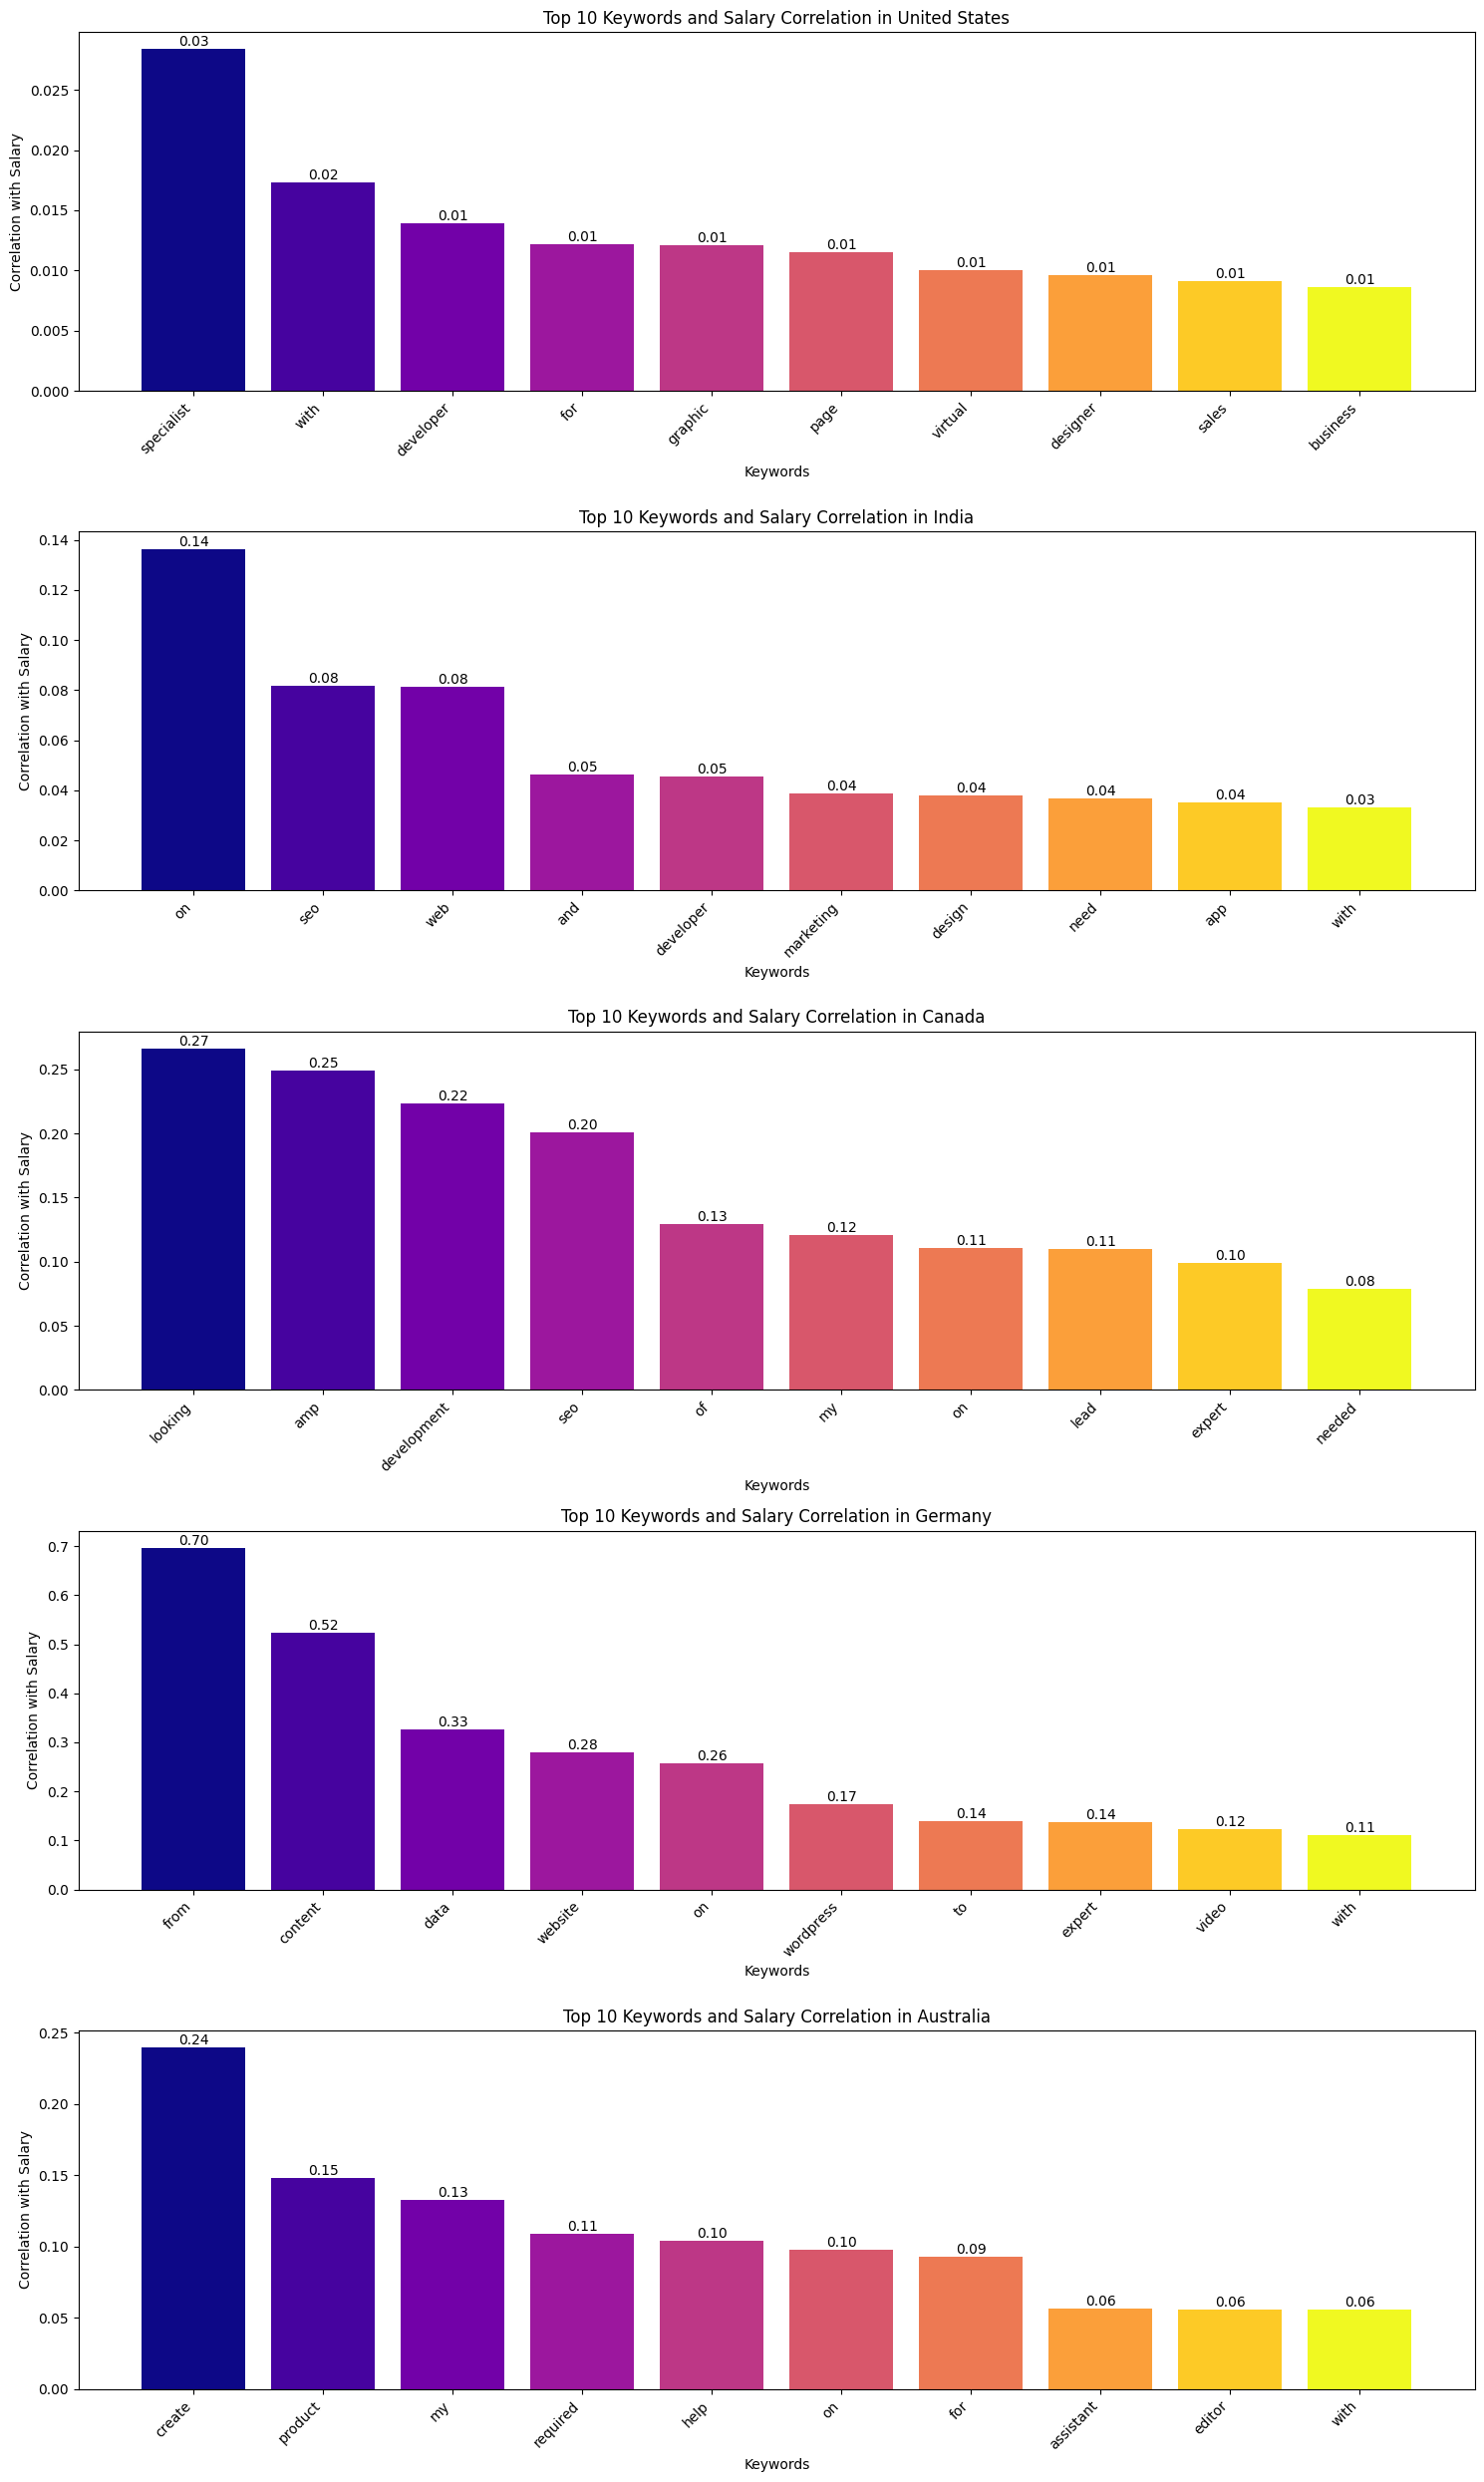

In [ ]:
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Convert 'budget' column to numeric, coercing errors to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

countries = ['United States', 'India', 'Canada', 'Germany', 'Australia']
plt.figure(figsize=(15, 25)) # Adjust figure size to accommodate multiple subplots

for i, country in enumerate(countries):
    # Filter data for the current country
    df_country = df[df['country'] == country]

    # Handle cases where there might be no data for a country
    if df_country.empty:
        print(f"No data found for {country}. Skipping.")
        continue

    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df_country['keywords_str'])
    tfidf_array = tfidf_matrix.toarray()
    tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

    keyword_salary_df = pd.concat([df_country['budget'], tfidf_df], axis=1)
    correlations = keyword_salary_df.corr()['budget'].drop('budget')
    top_keywords = correlations.abs().sort_values(ascending=False).head(10)

    plt.subplot(5, 1, i+1)
    colors = plt.cm.get_cmap('plasma', len(top_keywords))
    bars = plt.bar(top_keywords.index, top_keywords.values, color=colors(range(len(top_keywords))))

    for bar, value in zip(bars, top_keywords.values):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

    plt.xlabel("Keywords")
    plt.ylabel("Correlation with Salary")
    plt.title(f"Top 10 Keywords and Salary Correlation in {country}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()



Identify emerging job categories based on posting frequency

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:

def count_job_titles(df):
    """
    Counts the frequency of job titles and returns the top 10.
    """
    title_counts = Counter(df['title'])
    top_10_titles = title_counts.most_common(10)  # Get the top 10 most frequent job titles

    return top_10_titles

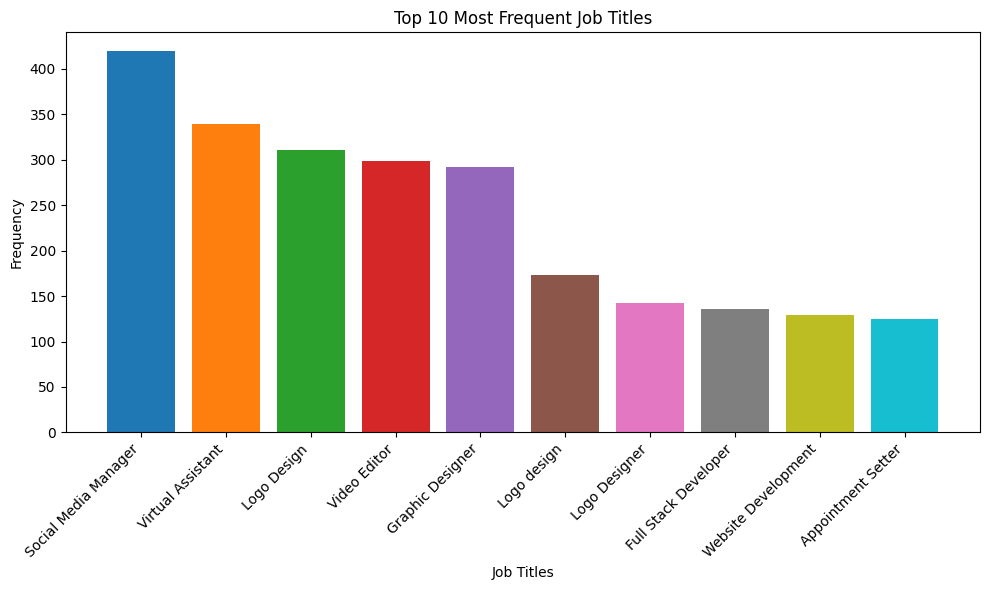

In [ ]:
def plot_top_job_titles(top_jobs):
    """
    Plots the top 10 job titles with different colors.
    """
    titles, counts = zip(*top_jobs)

    colors = plt.cm.get_cmap('tab10', len(titles))  # Use a colormap for distinct colors

    plt.figure(figsize=(10, 6))
    bars = plt.bar(titles, counts, color=colors(range(len(titles))))

    plt.xlabel("Job Titles")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Frequent Job Titles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_jobs = count_job_titles(df)
plot_top_job_titles(top_jobs)


Predict high-demand job roles by analyzing job posting patterns over time.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Function to extract keywords
def extract_keywords(title):
    if isinstance(title, str):
        tokens = word_tokenize(title)
        return tokens
    else:
        return []

# Extract keywords and convert them to a string
df['keywords'] = df['title'].apply(extract_keywords)
df['keywords_str'] = [' '.join(map(str, keywords)) for keywords in df['keywords']]

# Convert 'budget' column to numeric, handling errors
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')


# Function to predict job demand
def predict_job_demand(df, target_variable='budget'):
    # Prepare the data
    tfidf = TfidfVectorizer(max_features=50)
    tfidf_matrix = tfidf.fit_transform(df['keywords_str'])
    X = tfidf_matrix.toarray()  # Features
    y = df[target_variable]    # Target variable (e.g., budget or frequency)

    # Handle missing target values (important!)
    X = X[~y.isna()]
    y = y[~y.isna()]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    return model, tfidf

# Predict job demand based on budget
demand_model, tfidf_vectorizer = predict_job_demand(df)

# Example: predict demand for a new job title
new_job_title = "Python Data Analyst"
new_job_keywords = extract_keywords(new_job_title)
new_job_keywords_str = ' '.join(map(str, new_job_keywords))
new_job_tfidf = tfidf_vectorizer.transform([new_job_keywords_str])
predicted_demand = demand_model.predict(new_job_tfidf.toarray())
print(f"Predicted demand for '{new_job_title}': {predicted_demand[0]}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mean Squared Error: 246991562.15983844
R-squared: 0.003645915847859116
Predicted demand for 'Python Data Analyst': 648.5182032125143
